In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

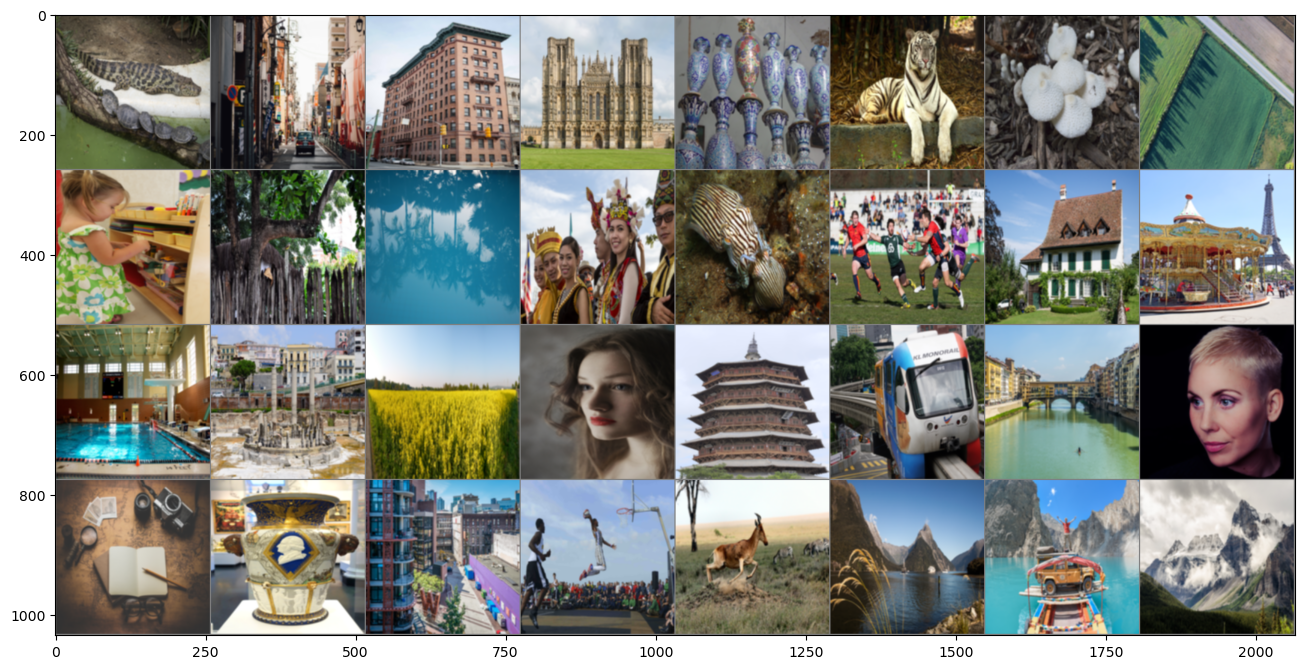

In [16]:
%matplotlib inline
IMAGE_DIR_PATH = "../data/DIV2K_train_LR_bicubic/X4"
images = os.listdir(IMAGE_DIR_PATH)
batch_size = 32
images_arr = []
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    v2.GaussianBlur(3, sigma=(1.5, 5)),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
for i, img in zip(range(batch_size), images):
    images_arr.append(transform(torchvision.io.read_image(os.path.join(IMAGE_DIR_PATH, img))))

plt.figure(figsize=(16, 16))
imshow(torchvision.utils.make_grid(images_arr))